In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load data into pandas
expert = pd.read_csv("/content/drive/MyDrive/datasets/manual_trajectories/expert.csv")
pgy4 = pd.read_csv("/content/drive/MyDrive/datasets/manual_trajectories/pgy4.csv")
pgy2 = pd.read_csv("/content/drive/MyDrive/datasets/manual_trajectories/pgy2.csv")

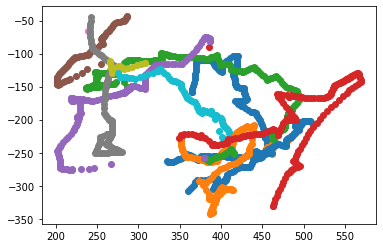

In [ ]:
# Plot PGY2 trajectory
for i in range(max(pgy2['pull']) + 1):
  plt.scatter(pgy2[pgy2['pull'] == i]['x'], pgy2[pgy2['pull'] == i]['y'])

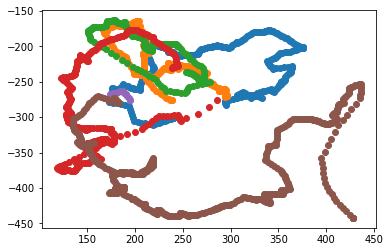

In [ ]:
# Plot PGY4 trajectory
for i in range(max(pgy4['pull']) + 1):
  plt.scatter(pgy4[pgy4['pull'] == i]['x'], pgy4[pgy4['pull'] == i]['y'])

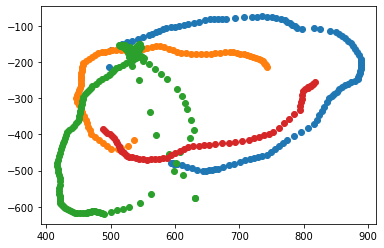

In [ ]:
# Plot expert trajectory
for i in range(max(expert['pull']) + 1):
  plt.scatter(expert[expert['pull'] == i]['x'], expert[expert['pull'] == i]['y'])

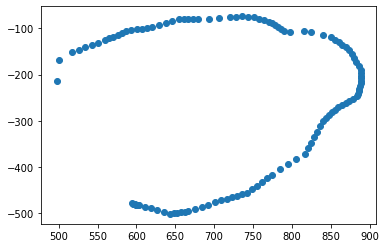

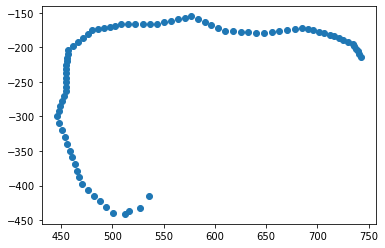

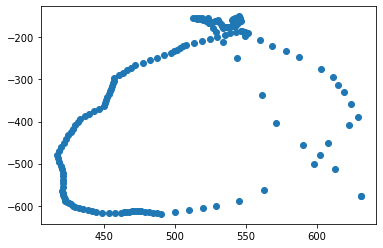

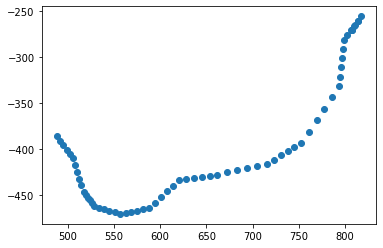

In [ ]:
# Plot all 4 pulls in expert trajectory
for i in range(max(expert['pull']) + 1):
  plt.figure()
  plt.scatter(expert[expert['pull'] == i]['x'], expert[expert['pull'] == i]['y'])
plt.show()

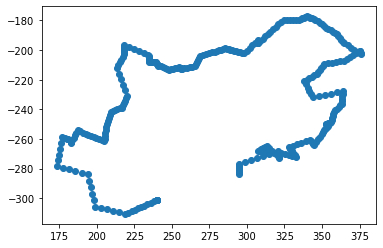

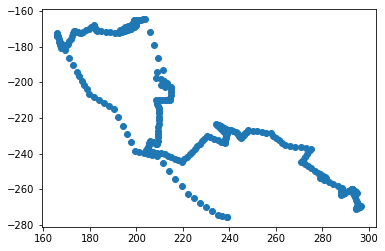

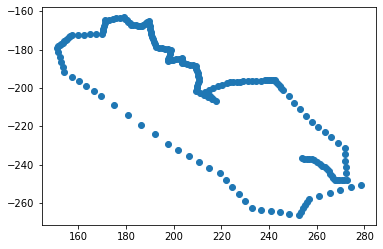

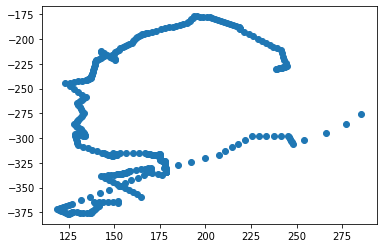

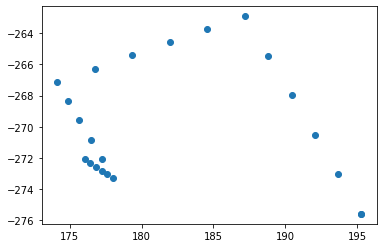

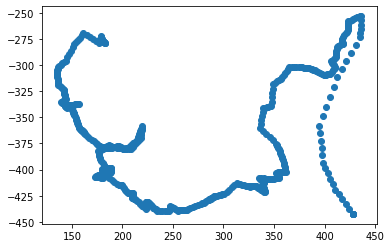

In [ ]:
# Plot all PGY4 trajectories
for i in range(max(pgy4['pull']) + 1):
  plt.figure()
  plt.scatter(pgy4[pgy4['pull'] == i]['x'], pgy4[pgy4['pull'] == i]['y'])
plt.show()

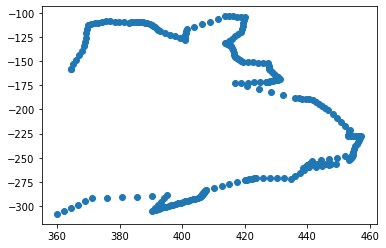

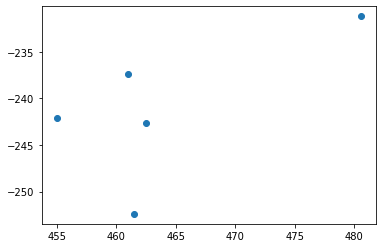

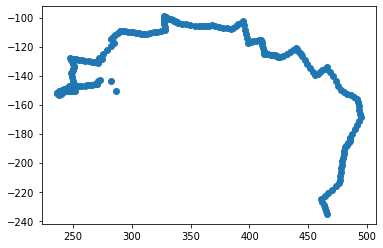

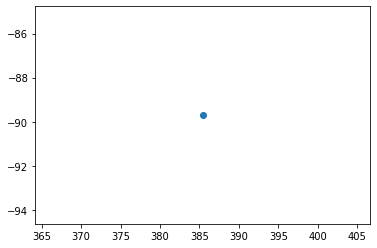

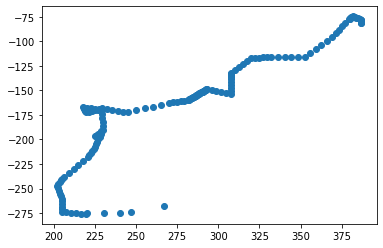

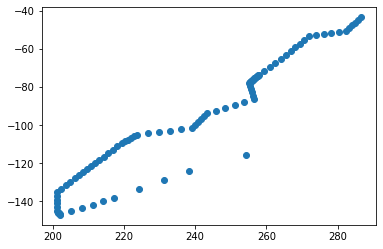

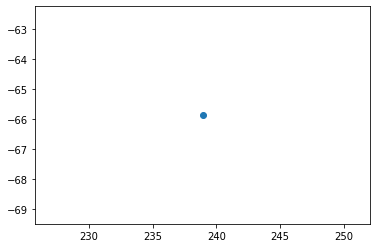

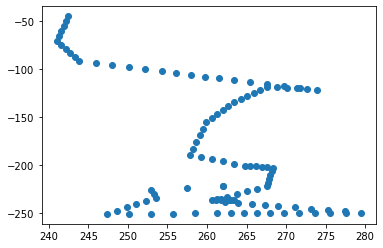

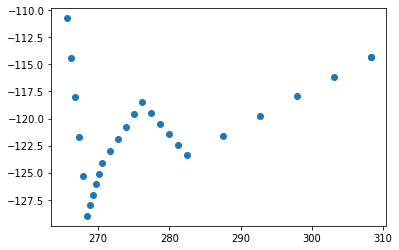

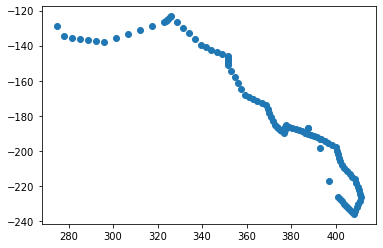

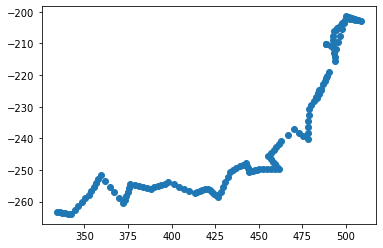

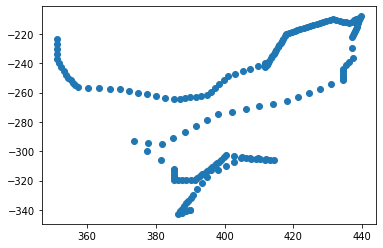

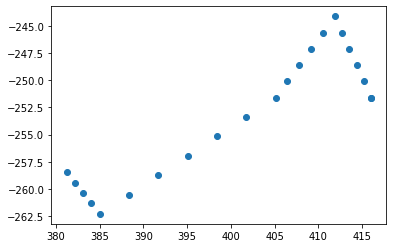

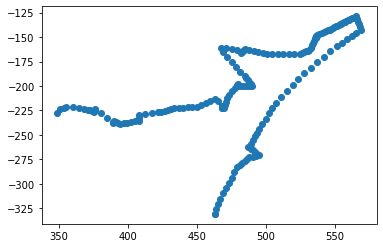

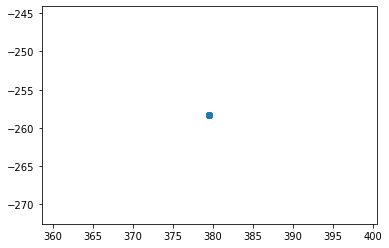

In [ ]:
# Plot all PGY2 trajectories
for i in range(max(pgy2['pull']) + 1):
  plt.figure()
  plt.scatter(pgy2[pgy2['pull'] == i]['x'], pgy2[pgy2['pull'] == i]['y'])
plt.show()

In [35]:
pull0 = expert[expert["pull"] == 0]

In [79]:
def pull_to_angles(pull):
  """
  Args:
    pull: The dataframe for the pull to convert to angles

  Return:
    angles: The angles for each triple of datapoints
  """
  x, y = pull.x, pull.y
  angles = []
  for i in range(len(x)-2):
    x1, x2, x3 = x[i:i+3]
    y1, y2, y3 = y[i:i+3]
    v1 = np.array([x1-x2, y1-y2])
    v2 = np.array([x3-x2, y3-y2])
    angle_nocos = np.dot(v1, v2) / (np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2))
    angle_floor = np.where(angle_nocos < -1, -1.0, angle_nocos)
    angle_ceil = np.where(angle_floor > 1, 1.0, angle_floor) 
    angle = np.arccos(angle_ceil) * 180 / np.pi
    angles.append(angle)
  return angles

In [81]:
def angles_to_bins(angles):
  """
  Args:
    angles: the list of angles to bin

  Returns:
    histogram: histogram values
    bins: histogram bins
  """
  bins = [i for i in range(0, 181, 5)]
  return np.histogram(angles, bins)


In [ ]:
angles = pull_to_angles(pull0)
angles